# HW-10 (answer key: Clustering)


Instructor: [Pedram Jahangiry](https://github.com/PJalgotrader)


### Question 1: K-Mean Clustering

Use the KMeans() class from sklearn.cluster module.  

1. Find the optimal number of clusters using the elbow method (clusters vs WCV)
2. Fit the K-Means to the data set. Use n_clusters=3 even if 3 is not the optimal number of clusters. We want to figure out what was the logic behind segmenting the customers into 3 groups in the original data set.
3. Find the accuracy of your clustering method. (important note: we know that Kmean clustering is an unsupervised model so finding the accuracy of the model does not make sense. However, in this example we can use the customer_Segment variable as target and construct the confusion matrix based on that. Finally you can report the accuracy for this set up. 

### Question 2:  Hierarchical Clustering

Use the AgglomerativeClustering() class from sklearn.cluster module.  

1. Explain why it is not a good idea to use dendrogram to find the optimal number of clusters in this exercise! 
2. Fit the hierarchical clustering to the data set. Use n_clusters=3 even if 3 is not the optimal number of clusters
3. Report the accuracy of your clustering method. (again use the customer_Segment variable as target and construct the confusion matrix based on that)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
df = pd.read_csv('Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X= df.drop('Customer_Segment', axis=1 , inplace=False)

### Question 1: K-Mean Clustering

1. Find the optimal number of clusters using the elbow method (clusters vs WCV)


In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [7]:
WCSS=[]
K= 10
for i in range(1,K+1):
    kmeans= KMeans(n_clusters=i, random_state=100)
    kmeans.fit(X_sc)
    WCSS.append(kmeans.inertia_) # inertia_ is Sum of squared distances of samples to their closest cluster center.    

In [8]:
optimal_k = pd.DataFrame({'K':range(1,K+1), 'WCSS':WCSS})
optimal_k

,K,WCSS
0,1,2314.000000
1,2,1658.758852
2,3,1277.928489
3,4,1181.686290
4,5,1102.488528
5,6,1043.781900
6,7,983.599024
7,8,946.490934
8,9,902.703814
9,10,852.075592


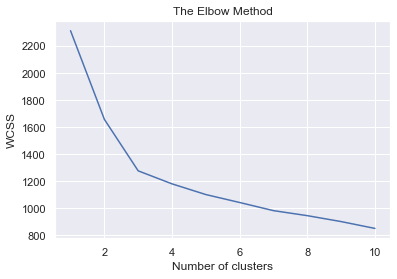

In [9]:
sns.lineplot(x='K', y='WCSS', data=  optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow method, it seems that the optimal number of clusters is K=3. This is exactly the same as the number of segments in the original data set! (Good news!) 

2. Fit the K-Means to the data set and compare clusters with customer_segments. Use n_clusters=3 even if 3 is not the optimal number of clusters. We want to figure out what was the logic behind segmenting the customers into 3 groups in the original data set.


In [10]:
# Fitting the Kmeans with K=3 to the data
kmean_clusters = KMeans(n_clusters=3, random_state=100).fit_predict(X_sc)

In [11]:
comparison = pd.DataFrame({'Kmean Clusters':kmean_clusters, 'Original segments':df['Customer_Segment']})
comparison.head()

,Kmean Clusters,Original segments
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


3. Find the accuracy of your clustering method. (important note: we know that Kmean clustering is an unsupervised model so finding the accuracy of the model does not make sense. However, in this example we can use the customer_Segment variable as target and construct the confusion matrix based on that. Finally you can report the accuracy for this set up. 

In [12]:
# defining our own confusion matrix function for multiple classes
from sklearn.metrics import confusion_matrix
def multi_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    accuracy = round(np.diag(cm).sum()/cm.sum(),2)
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print("-----------------------------------------")
    return cm
 

In [13]:
multi_confusion_matrix(df['Customer_Segment'], kmean_clusters)



Accuracy = 0.37
-----------------------------------------


array([[ 0,  0,  0,  0],
       [59,  0,  0,  0],
       [ 3,  3, 65,  0],
       [ 0, 48,  0,  0]], dtype=int64)

# 2) Hierarchical Clustering

1. Explain why it is not a good idea to use dendrogram to find the optimal number of clusters in this exercise! 

**because the number of observations is relatively large and it is not easy to visually find the optimal number of clusters from a dendrogram**

In [14]:
import scipy.cluster.hierarchy as sch

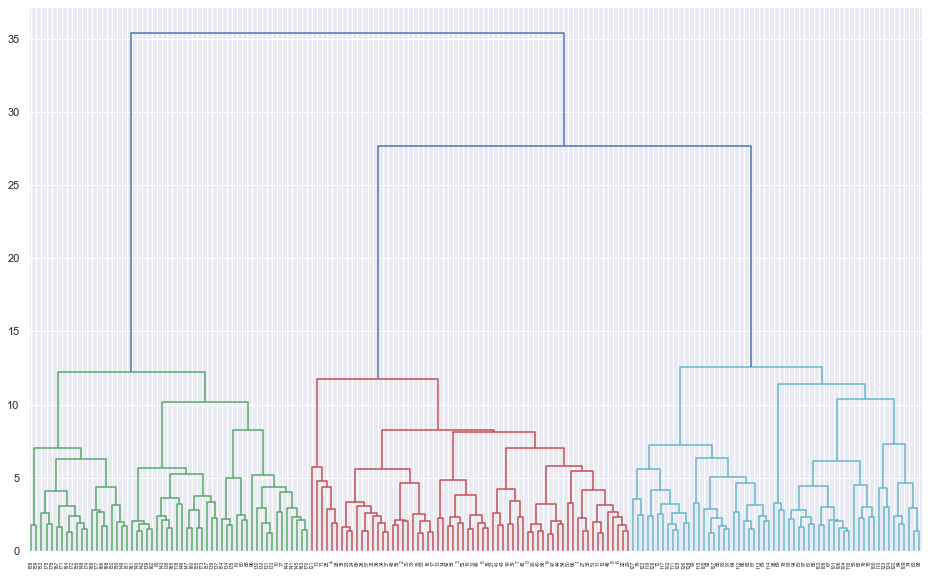

In [15]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(X_sc,method='ward'))
# 'ward' uses the Ward variance minimization algorithm

As you can see, it is hard to find the optimal # of clusters here!!

2. Fit the hierarchical clustering to the data set and compare clusters with customer_segment. Use n_clusters=3 even if 3 is not the optimal number of clusters

In [16]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df)

In [17]:
comparison2 = pd.DataFrame({'Hierarchical Clusters':hc_clusters, 'Original segments':df['Customer_Segment']})
comparison2.head()

,Hierarchical Clusters,Original segments
0,0,1
1,0,1
2,0,1
3,0,1
4,2,1


3. Report the accuracy of your clustering method. (again use the customer_Segment variable as target and construct the confusion matrix based on that)

In [18]:
multi_confusion_matrix(df['Customer_Segment'], hc_clusters)



Accuracy = 0.1
-----------------------------------------


array([[ 0,  0,  0,  0],
       [46,  0, 13,  0],
       [ 2, 51, 18,  0],
       [ 0, 21, 27,  0]], dtype=int64)

It seems that the original customer segmentation is closer to Kmean Clustering rather than Hierarchical clustering. 